I. Set Up

In [ ]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import ipywidgets as widgets
from IPython.display import clear_output
import random
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
import astropy.stats as astats
import hepstats
from hepstats import *
# CIAO Imports
import ciao_contrib.runtool
from ciao_contrib.runtool import *
from ciao_contrib.runtool import search_csc, obsid_search_csc
from sherpa.astro import ui
# CUSTOM Imports
from data_exploration_functions import *
from data_extraction_functions import *
from data_representation_functions import *

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[0],description='Set :',disabled=False); set_widget

: 

II. Load Data

In [3]:
from matplotlib.colors import LogNorm
from sherpa.astro import ui
# Set ID
set_id = set_widget.value

df_eventfiles_input = pd.read_csv(f'{global_path}/{set_id}/eventfiles-input-{set_id[0:4]}.csv')
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id[0:4]}.csv')

df_properties_global = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id[0:4]}.csv')
df_properties_global['obsreg_id'] = df_properties_global['obsid'].astype(str) + '_' + df_properties_global['region_id'].astype(str)

df_eventfiles_group = df_eventfiles_input.groupby('obsreg_id')
df_properties_group = df_properties_input.groupby('obsreg_id')

print("Number of Eventfiles: ", df_eventfiles_group.ngroups)
print("Number of Property Sets: ", df_properties_group.ngroups)

#print("ObsID and RegID: ", df_eventfiles_group.groups.keys())

Number of Eventfiles:  95473
Number of Property Sets:  95473


Exploratory

In [4]:
# name_id = 'J2' #'J234503.4−423841' # '2CXO J050706.7−315210' '2CXO J010344.5−214845'
# obs_id =  [793]
# name_id = 'J133703'
# obs_id =  [1586,9533]
# name_id = 'J123945.2'
obs_id =  [22096] # [16093,16453,18715,19310,20635, 21831, 23103,24604] #, 5644, 13812, 3953, 9550, 735, 5929, 942, 6152]
name_id = ' J'

# CXOU J031702.5-410714 CXOU J021404.0+275239

# # Define the condition
# condition = df_properties_global['obsreg_id'] == '4062_31'#'13814_567'

# # Get the index of rows that satisfy the condition
# index_of_rows = df_properties_global.index[condition].tolist()

# # Print the index of rows
# print(index_of_rows)


# result = df_properties_global[(df_properties_global['name'].str.contains(name_id)) & (df_properties_global['obsreg_id'].str.startswith(obs_id))]
result = df_properties_global[(df_properties_global['obsid'].isin(obs_id))]
result = result[(result['name'].str.contains(name_id))]

result = result[(result['var_index_b']> 0)]

result.head(100)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,...,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id
11826,2CXO J011908.6-341130,19.786117,-34.191833,0.712887,0.712874,0.000000,21.561498,TRUE,False,False,...,-0.885072,1.000000,0.379855,1.0000,1.0,10.0,NaN,72604.905303,ACIS-7,22096_9
11835,2CXO J011915.7-340556,19.815833,-34.099129,1.627103,1.064220,133.003378,5.176471,TRUE,False,False,...,0.680200,0.582385,0.387152,0.5156,NaN,1.0,NaN,72604.905303,ACIS-7,22096_80


Select

In [12]:
all_ids = list(df_eventfiles_group.groups.keys())
# all_names = list(df_properties_global['name'])
flares = ['4395_992','16444_1025','2227_220','9518_47','9109_333','9109_344','13637_1078','14368_489','14368_503','14431_16','14542_18','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29','1042_24']
dips = ['10783_10','10871_10','11059_10','9070_10','9072_10','13814_567','13682_9','1708_192','1708_193','1712_91','15553_237','13681_9','13813_86']
newfound = ['10346_11','10542_331','10545_496','10556_5752','10556_6687','10811_223','10821_241', '1878_331','10930_1050','10953_275','10956_64']
somename = ['10542_331','10545_338','10544_380']
select = ['10783_10', '14368_489']
tsne = ['11176_73','11390_136','12301_42']
#####SELECTED ANOMALIES
dip_in_blip = ['14431_16']
dips_select = ['10783_10','10871_10','11059_10','9070_10','9072_10','11272_13','10783_10','13682_9','1708_192','1708_193','1712_91','15553_237','13681_9','13813_86','11988_38','13814_586','13812_586','13828_596','13828_46']
dips_maybe = ['12992_101','12995_101','13814_586','13813_218','13814_237','13828_596']
flares_select = ['10542_331','4395_992','2227_220','16444_1025','14368_503','14431_16','14542_18','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29','9109_333','9109_344','13637_1078','14368_489','1042_24','11016_168','11737_157','12390_136']
flares_maybe = ['10542_331','10556_6687','10556_5752','10556_6687']
rosanne = ['13814_567']
caleb = ['13812_86','13813_86','793_107','808_47','4733_229','4736_81','4737_74','5322_229',] #,'4737_21','934_23','5309_17']
caleb_flares = ['1586_59','9533_24']
lin = ['4062_31', '13454_56','20635_58']  # yes, yes, yes
irwin = ['3926_13','7800_4','7799_16','8490_30'] # yes, no, no ,no, no  ['3926_13','7800_4','7799_16','8490_30']
xue = ['957_208', '3389_274','15211_38','15214_29']
goulding_nandra = ['9875_166', '9456_274', '5849_62', '8636_2', '8636_3'] # last one not listed
civian_marchesi = ['8021_33'] 
glennie = ['12884_10']
vasquez = ['2025_39','9546_17','9548_14','12264_54','15113_59']
jonker = ['803_90']
not_liste_xue = ['15211_44', '15211_3']
what = ['6152_220','6152_79','6152_26']
NEW_FLARE = ['9548_5','9548_195']


######
filtered_ids = [id for id in all_ids if id.split('_')[1] == '2']
ran = random.randint(0, 80000)
random_ids = all_ids[ran:ran+10]
# filtered_name = [name for name in all_names if name == '2CXO J095700.2+693419']
# keep = dips + flares
# keep = rosanne + lin + irwin
# keep = ['4395_2680','4567_200','4396_114','4395_1800']
# keep = ['4733_229','4736_81','4737_74','5322_229']
# keep = ['10783_10','14368_489'] # + dips_select
# keep = ['13814_567','4062_31'] 
# keep = xue + goulding_nandra
# keep = ieva 
# # keep = caleb
# # keep = filtered_ids
# # name = ['2CXO J140515.6+542458']
# # # name = ['2CXO J234503.4−423841', '2CXO J050706.7−315210', '2CXO J010344.5−214845']
# # keep = ['10995_21','13814_567']
# # keep = ['4062_31','13814_567']
# # keep = ['10783_10','14368_489']

# keep = ['10062_106','10059_967']
# keep = ['8898_123']
# name = ['2CXO J140414.2+542604'] # 3 dips
# name = ['2CXO J140414.2+542604']
# # name = ['2CXO J122531.5+130357']
# # name = ['2CXO J053524.1-052132']
# # name = ['2CXO J225754.3+620159']
# # name = ['2CXO J125639.6+472411']
# keep = ['10059_967','10783_10','14368_489','4062_31','13814_567'] # thesis
# keep = ['13814_567'] # thesis
# keep = NEW_FLARE
name = ['2CXO J051117.2-672556'] #FXT????
name = ['2CXO J134856.4+263944']

# DIPS ET AL
parmar = ['10783_10','10871_10','11059_10','9070_10','9072_10'] # LMXB
distefano = ['13814_567']
m101ulx = ['4736_81','6170_74','4733_229','4737_74','5300_95','5322_229','6152_81']
# ieva = ['11272_13','13812_586','13812_218','9550_17','942_101','6152_79']

# FLARES ET AL 
lin = ['4062_31', '13454_56','20635_58','24604_8'] 
xue = ['957_208', '3389_274','15211_38','15214_29']
irwin = ['3926_13','7800_4','7799_16','8490_30']
glennie = ['12884_10']
jonker = ['803_90']
vasquez = ['2025_39','9546_17','9548_14','12264_54','15113_59'] # 2022
vasquez2 = ['24604_8','21831_22'] # 2022
goulding_nandra = ['8636_2', '8636_3'] # last one not listed 2012 2015 22096	


keep = distefano 
keep = ['18953_3']
keep = ['23022_122']
keep = ['4373_704','17196_22','15718_1']
keep = ['22096_9']
# NEW = ['23022_122']
# keep = NEW
# name = ['2CXO J051117.2-672556']

# 5322_229
df_properties_anomalies = df_properties_global[df_properties_global['obsreg_id'].isin(keep)]
# df_properties_anomalies = df_properties_global[df_properties_global['name'].isin(name)]

keep = df_properties_anomalies.obsreg_id.values
pd.set_option('display.max_columns', None)
df_properties_anomalies.head(50)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,streak_src_flag,flux_aper_b,flux_aper_lolim_b,flux_aper_hilim_b,flux_aper_w,flux_aper_lolim_w,flux_aper_hilim_w,flux_aper_avg_b,flux_aper_avg_lolim_b,flux_aper_avg_hilim_b,flux_aper_avg_w,flux_aper_avg_lolim_w,flux_aper_avg_hilim_w,obsid,obi,gti_obs,gti_end,region_id,theta,phi,flux_significance_b,flux_significance_w,likelihood_b,likelihood_w,conf_code,extent_code,sat_src_flag.1,streak_src_flag.1,var_code,major_axis_b,minor_axis_b,pos_angle_b,major_axis_w,minor_axis_w,pos_angle_w,cnts_aper_b,cnts_aperbkg_b,cnts_aper_w,src_cnts_aper_b,src_cnts_aper_w,src_rate_aper_b,src_rate_aper_w,flux_aper_b.1,flux_aper_lolim_b.1,flux_aper_hilim_b.1,flux_aper_w.1,flux_aper_lolim_w.1,flux_aper_hilim_w.1,hard_hm,hard_hm_lolim,hard_hm_hilim,hard_ms,hard_ms_lolim,hard_ms_hilim,hard_hs,hard_hs_lolim,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id
11826,2CXO J011908.6-341130,19.786117,-34.191833,0.712887,0.712874,0.0,21.561498,TRUE,False,False,False,1.554857e-13,1.454211e-13,1.655502e-13,NaN,NaN,NaN,1.554857e-13,1.454211e-13,1.655502e-13,NaN,NaN,NaN,22096,0,2019-02-14T16:52:01,2019-02-15T13:18:07,9,0.27613,307.185336,15.387374,NaN,1260.657713,NaN,0,19,False,False,22,0.272668,0.272668,0.0,NaN,NaN,NaN,314,59,NaN,327.063794,NaN,0.004505,NaN,1.554857e-13,1.454211e-13,1.655502e-13,NaN,NaN,NaN,-0.228607,-0.345409,-0.109307,-0.853217,-0.875078,-0.830106,-0.905684,-0.923798,-0.885072,1.0,0.379855,1.0,1.0,10.0,NaN,72604.905303,ACIS-7,22096_9


Plots

In [7]:
imperial = '#003E74'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'
gold2 = '#dfc16d' #new but maybe worse
harvard2 = '#ed1b34'

def hist2D(df_eventfile_input, id_name, nbins_E, nbins_t, norm = 'minmax', plot = True, colmap = 'plasma', lognorm = True):
    # Define Font Settings
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Gill Sans'
    # Copy df
    df = df_eventfile_input.copy()
    df.sort_values(by='time', inplace = True) 
    df.reset_index(drop=True, inplace = True)
    # Define histogram boundaries
    E_start = np.log10(500)
    E_end = np.log10(7000)
    t_start = 0
    t_end = 1
    # IDs
    obsid = id_name.split("_")[0]
    regid = id_name.split("_")[1]
    # Eventfile length and duration
    N_length = len(df) 
    T_duration = max(df["time"])-min(df["time"])
    # Add E, t column
    df["E"] = np.log10(df["energy"])
    df["t"] = (df["time"]-min(df["time"]))/(max(df["time"])-min(df["time"]))
    # Add Et histogram
    hist_Et = np.histogram2d(df["t"],df["E"],range = [[t_start,t_end],[E_start, E_end]],bins=(nbins_t,nbins_E)) 
    # Create feature
    if norm == 'minmax':
        feature = (hist_Et[0]-np.min(hist_Et[0]))/(np.max(hist_Et[0])-np.min(hist_Et[0]))
    elif norm == 'none':
        feature = hist_Et[0]
    if plot == True:
        fig = plt.figure(figsize=(6, 6))
        if lognorm == True:
            plt.imshow(feature.T, origin='lower', extent=[0, 1, E_start, E_end], cmap=colmap,norm=LogNorm())
        elif lognorm == False:
            plt.imshow(feature.T, origin='lower', extent=[0, 1, E_start, E_end], cmap=colmap)
        #plt.colorbar()
        plt.xlabel(r'$\tau$')
        plt.ylabel(r'$\epsilon$')
        # plt.title(f'ObsID: {obsid}, RegID: {regid}, N: {N_length}, T: {int(T_duration)}s')
        plt.show()
    return feature


def hist3D(df_eventfile_input, id_name, nbins_E, nbins_t, nbins_dt, norm = 'minmax', plot = True, colmap = 'plasma', lognorm = True):
    # Define Font Settings
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Gill Sans'
    # Copy df
    df = df_eventfile_input.copy()
    df.sort_values(by='time', inplace = True) 
    df.reset_index(drop=True, inplace = True)
    # Define histogram boundaries
    E_start = np.log10(500)
    E_end = np.log10(7000)
    t_start = 0
    t_end = 1
    dt_start = 0
    dt_end = 1
    # IDs
    obsid = id_name.split("_")[0]
    regid = id_name.split("_")[1]
    # Eventfile length and duration
    N_length = len(df) 
    T_duration = max(df["time"])-min(df["time"])
    # Add E, t, dt columns
    df["E"] = np.log10(df["energy"])
    df["t"] = (df["time"]-min(df["time"]))/(max(df["time"])-min(df["time"]))
    # df["delta_time"] = df['time'].diff().shift(-1)
    # df = df[df["delta_time"].notna()]
    # df["dt"] = (df['delta_time'] - df['delta_time'].mean()) / df['delta_time'].std() 
    # df["dt"] = (df["dt"]-min(df["dt"]))/(max(df["dt"])-min(df["dt"]))
    df["delta_time"] = df['t'].diff().shift(-1)
    df = df[df["delta_time"].notna()]
    df["dt"] = (df['delta_time']-min(df['delta_time']))/(max(df['delta_time'])-min(df['delta_time']))
    # Add Etdt histogram
    hist3D, edges = np.histogramdd((df["t"], df["E"], df["dt"]), range = [[t_start,t_end],[E_start, E_end], [dt_start, dt_end]],bins=(nbins_t,nbins_E, nbins_dt))
    # Create feature
    if norm == 'minmax':
        feature = (hist3D-np.min(hist3D))/(np.max(hist3D)-np.min(hist3D))
    elif norm == 'none':
        feature = hist3D
    # Plot
    if plot == True:
        fig = plt.figure(figsize=(12, 12),constrained_layout = True)
        # fig.suptitle(f'ObsID: {obsid}, RegID: {regid}, N: {N_length}, T: {int(T_duration)}s')
        # Plot the E-t projection
        ax1 = fig.add_subplot(2, 2, 1)
        if lognorm == True:
            ax1.imshow(hist3D.sum(axis=2).T, origin='lower', extent=[t_start,t_end, E_start, E_end],cmap=colmap,norm=LogNorm())
        elif lognorm == False:
            ax1.imshow(hist3D.sum(axis=2).T, origin='lower', extent=[t_start,t_end, E_start, E_end],cmap=colmap)
        ax1.set_xlabel(r'$\tau$')
        ax1.set_ylabel(r'$\epsilon$')
        ax1.set_title(r'$\epsilon$ vs $\tau$ Projection')

        # Plot the dt-t projection
        ax2 = fig.add_subplot(2, 2, 2)
        if lognorm == True:
            ax2.imshow(hist3D.sum(axis=1).T, origin='lower', extent=[t_start,t_end, dt_start, dt_end],cmap=colmap,norm=LogNorm())
        elif lognorm == False:
            ax2.imshow(hist3D.sum(axis=1).T, origin='lower', extent=[t_start,t_end, dt_start, dt_end],cmap=colmap)
        ax2.set_xlabel(r'$\tau$')
        ax2.set_ylabel(r'$\delta\tau$')
        ax2.set_title(r'$\delta\tau$ vs $\tau$ Projection')

        # Plot the YZ projection
        ax3 = fig.add_subplot(2, 2, 3)
        if lognorm == True:
            ax3.imshow(hist3D.sum(axis=0), origin='lower', extent=[dt_start,dt_end, E_start, E_end],cmap=colmap,norm=LogNorm())
        elif lognorm == False:
            ax3.imshow(hist3D.sum(axis=0), origin='lower', extent=[dt_start,dt_end, E_start, E_end],cmap=colmap)
        ax3.set_xlabel(r'$\delta\tau$')
        ax3.set_ylabel(r'$\epsilon$')
        ax3.set_title(r'$\epsilon$ vs $\delta\tau$ Projection')

        # Plot 3D Histogram
        ax4 = fig.add_subplot(2, 2, 4, projection='3d')
        tt, EE, dtdt = np.meshgrid(edges[0][:-1], edges[1][:-1], edges[2][:-1], indexing='ij')
        tt = np.ravel(tt)
        EE = np.ravel(EE)
        dtdt = np.ravel(dtdt)
        h = np.ravel(hist3D)
        if lognorm == True:
            ax4.scatter(dtdt, tt, EE, s=1.5*np.log(h*10000), alpha=0.9, edgecolors='none', c=h, cmap=colmap, norm = LogNorm())
        elif lognorm == False:
            ax4.scatter(dtdt, tt, EE, s=1.5*np.log(h*10000), alpha=0.9, edgecolors='none', c=h, cmap=colmap)
        ax4.set_xlabel(r'$\delta\tau$')
        ax4.set_ylabel(r'$\tau$')
        ax4.set_zlabel(r'$\epsilon$')
        ax4.set_title('3D Histogram')
        ax4.view_init(elev=30, azim=45)
        ax4.xaxis.set_ticks_position('bottom')
        ax4.yaxis.set_ticks_position('top')
        ax4.zaxis.set_ticks_position('bottom')
        ax4.invert_xaxis()
        plt.show()
    return feature

# 6. Lightcurve Plotter Function
def lc_plotter(df_eventfiles_input,id_name,bin_size_sec, bb_p0 = 0.01, plot_what = 'lightcurve',c1 = '#003E74', c2 = '#dfc16d', c3 = '#A51C30'):
    """
    DESCRIPTION: Plots lightcurves and cumulative counts for given eventfile input dataframe
    INPUT: 1. Original eventfile table, 2. Original properties table, 3. Global Path, 4. Set Name
    OUTPUT: 1. Reduced eventfile table, 2. Reduced properties table
    """
    # Define Font Settings
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Gill Sans'
    # Prepare df
    df = df_eventfiles_input.copy()
    df['time'] = df_eventfiles_input['time'] - min(df_eventfiles_input['time'])
    df = df.sort_values(by='time') 
    df = df.reset_index(drop=True)
    # Create binned lightcurve
    df_binned = df.groupby(df['time'] // bin_size_sec * bin_size_sec).agg(
        broad_count = ('energy', lambda x: ((x >= 500) & (x <= 7000)).sum()),
        soft_count =('energy', lambda x: ((x >= 500) & (x < 1200)).sum()),
        medium_count=('energy', lambda x: ((x >= 1200) & (x < 2000)).sum()),
        hard_count=('energy', lambda x: ((x >= 2000) & (x <= 7000)).sum()))
    # Create rolling 3-bin averaged lightcurved
    df_rolling = df_binned.rolling(window=3, center=True).mean()
    rolling_std = df_binned.rolling(window=3, center=True).std()
    errors = rolling_std['broad_count']/math.sqrt(3)
    errors.iloc[0] = errors.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors.iloc[-1] = errors.iloc[-1] * math.sqrt(3)/math.sqrt(2)

    errors_h = rolling_std['hard_count']/math.sqrt(3)
    errors_h.iloc[0] = errors_h.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors_h.iloc[-1] = errors_h.iloc[-1] * math.sqrt(3)/math.sqrt(2)

    errors_m = rolling_std['medium_count']/math.sqrt(3)
    errors_m.iloc[0] = errors_m.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors_m.iloc[-1] = errors_m.iloc[-1] * math.sqrt(3)/math.sqrt(2)

    errors_s = rolling_std['soft_count']/math.sqrt(3)
    errors_s.iloc[0] = errors_s.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors_s.iloc[-1] = errors_s.iloc[-1] * math.sqrt(3)/math.sqrt(2)

    # Create cumulative count plot
    df_cumulative = df.copy()
    df_cumulative['count'] = 1
    df_cumulative['cumulative_count'] = df_cumulative['count'].cumsum()

    # Create a HR plot
    df_hr = df_binned.copy()
    df_hr['hr_hm'] = (df_hr['hard_count']-df_hr['medium_count'])/(df_hr['hard_count']+df_hr['medium_count'])
    df_hr['hr_hs'] = (df_hr['hard_count']-df_hr['soft_count'])/(df_hr['hard_count']+df_hr['soft_count'])
    df_hr['hr_ms'] = (df_hr['medium_count']-df_hr['soft_count'])/(df_hr['medium_count']+df_hr['soft_count'])
    
    # Create plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    if plot_what == 'lightcurve':
        # Plot binned lightcurve
        print(f'Bin Size {bin_size_sec}s')
        ax.step(df_binned.index/1000, df_binned['broad_count'], color = c2 ,where="mid")#, marker = 'o', markerfacecolor = 'black', markersize = 8)
        ax.fill_between(df_binned.index/1000, df_binned['broad_count'], step="mid", color = c2, alpha=0.4,label=f'Time Binned Eventfile')
        ax.plot(df_rolling.index/1000, df_rolling['broad_count'], color = c1, label='Running Average Lightcurve')
        ax.errorbar(df_rolling.index/1000, df_rolling['broad_count'], yerr = errors, xerr = None,fmt ='.',color = c1,linewidth = 1,capsize = 2)
        ax.set_xlim([0,max(df_binned.index/1000)])
        ax.set_ylim([0,max(df_binned['broad_count'])*1.3])
        ax.set_ylabel('Counts')
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.minorticks_on()
        ax.legend(loc='best',frameon=False)

    if plot_what == 'bands':
        # Plot binned lightcurve
        print(f'Bin Size {bin_size_sec}s')
        # ax.step(df_binned.index/1000, df_binned['broad_count'], color = bright,where="mid")#, marker = 'o', markerfacecolor = 'black', markersize = 8)
        # ax.fill_between(df_binned.index/1000, df_binned['broad_count'], step="mid", color = bright, alpha=0.4,label=f'Time Binned Eventfile')
        ax.plot(df_rolling.index/1000, df_rolling['hard_count'], color = c1, label='Hard')
        ax.plot(df_rolling.index/1000, df_rolling['medium_count'], color = c2, label='Medium')
        ax.plot(df_rolling.index/1000, df_rolling['soft_count'], color = c3, label='Soft')
        ax.errorbar(df_rolling.index/1000, df_rolling['hard_count'], yerr = errors_h, xerr = None,fmt ='.',color = c1,linewidth = 1,capsize = 2)
        ax.errorbar(df_rolling.index/1000, df_rolling['medium_count'], yerr = errors_m, xerr = None,fmt ='.',color = c2,linewidth = 1,capsize = 2)
        ax.errorbar(df_rolling.index/1000, df_rolling['soft_count'], yerr = errors_s, xerr = None,fmt ='.',color = c3,linewidth = 1,capsize = 2)
        ax.set_xlim([0,max(df_binned.index/1000)])
        ax.set_ylim([0,np.max([df_binned['hard_count'],df_binned['medium_count'],df_binned['soft_count']])*1.3])
        ax.set_ylabel('Counts')
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.minorticks_on()
        ax.legend(loc='best',frameon=False)
    if plot_what == 'hr':
        ax.step(df_hr.index/1000, df_hr['hr_hs'], color = c1, label = 'H-S')
        ax.step(df_hr.index/1000, df_hr['hr_hm'], color = c2, label = 'H-M')
        ax.step(df_hr.index/1000, df_hr['hr_ms'], color = c3, label = 'M-S')
        ax.set_xlim([0,max(df_hr.index/1000)])
        ax.set_ylim([-1,1])
        ax.set_ylabel('HR')
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.minorticks_on()
        ax.legend(loc='best',frameon=False)
    if plot_what == 'bb':
        # Create a BB plot
        bb_bins = astats.bayesian_blocks(df['time'].values/1000, fitness='events',p0 = bb_p0) # p0 = 0.01 or so BASED ON VINAY ! 6?
        bin_widths = bb_bins[1:] - bb_bins[:-1]
        counts, bins, _ =  ax.hist(df['time']/1000, bins=bb_bins, color=c2, histtype='step')
        ax.fill_between(bb_bins, np.append(counts, counts[-1]), step="post", color = c2, alpha=0.4, label='Bayesian Blocks Counts')
        ax.tick_params(direction='in', top=True)
        ax.minorticks_on()
        ax.set_ylim([0,max(counts)*1.3])
        ax.yaxis.label.set_color(c2)
        ax.tick_params(axis='y', colors=c2)
        ax.set_ylabel('Counts')
        countrate = counts/bin_widths 
        bin_centers = (bb_bins[:-1] + bb_bins[1:]) / 2
        ax2 = ax.twinx()
        rate = ax2.step(bb_bins, np.append(countrate, countrate[-1]), where='post', color=c1,label = 'Bayesian Blocks Count Rate')
        ax2.minorticks_on()
        ax2.set_ylabel('Count Rate')
        ax2.yaxis.label.set_color(c1)
        ax2.tick_params(axis='y', colors=c1)
        ax2.set_ylim([0,max(countrate)*1.3])
        ax2.tick_params(direction='in', top=True)
        # Combine all labels in one legend
        handles, labels = ax.get_legend_handles_labels()
        handles += rate
        labels += ['Bayesian Blocks Count Rate']
        plt.legend(handles=handles, labels=labels, loc='upper right', frameon=False)

    ax.set_xlabel('Time [ks]')
    plt.show()
    return

# 6. Lightcurve Plotter Function
def csc_plotter(df_eventfiles_input,id_name,pha_folder,group_counts = 10,t_start = 2.0, t_end = 5.0, fmt = '_', plot_what = 'lc',c1 = '#003E74', c2 = '#dfc16d', c3 = '#A51C30'):
    """
    DESCRIPTION: Plotsspectrum
    """
    obsid = id_name.split("_")[0]
    regionid = id_name.split("_")[1]
    pha_filename = [spec for spec in glob.iglob(f'{pha_folder}/acisf*pha3.fits.gz') if str(obsid) in spec and str(regionid) in spec][0]
    lc_filename = [lcurve for lcurve in glob.iglob(f'{pha_folder}/acisf*lc3.fits.gz') if str(obsid) in lcurve and str(regionid) in lcurve][0]
    # Define Font Settings
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Gill Sans'
    # Create plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))

    if plot_what == 'lc':
        with fits.open(lc_filename) as hdul_lc:
            lc3 = hdul_lc[1].data
            bg3 = hdul_lc[2].data
            time = lc3['Time'] - min(lc3['Time'])
            countrate = lc3['COUNT_RATE']
            y_err = lc3['COUNT_RATE_ERR']
            ax.plot(time,countrate,color=c1,label='CSC 2.1 Lightcurve')
            ax.plot(time,countrate, color='white',linewidth=3)
            ax.errorbar(time,countrate,y_err,fmt =fmt,color = c1,linewidth = 1,capsize = 2)
            ax.set_xlabel('Time [s]')
            ax.set_ylabel('Count Rate [1/s]')
            # Print the headers and data in all the HDUs
            hdul_lc.info()
    elif plot_what == 'lc-log':
        with fits.open(lc_filename) as hdul_lc:
            lc3 = hdul_lc[1].data
            bg3 = hdul_lc[2].data
            time = lc3['Time'] - min(lc3['Time'])
            idx = [i for i in range(len(time)) if time[i] >= t_start and time[i] <= t_end]
            time = time[idx]
            countrate = lc3['COUNT_RATE']/1000000000
            countrate= countrate[idx]
            y_err = lc3['COUNT_RATE_ERR']/1000000000
            y_err = y_err[idx]
            ax.plot(time,countrate,color=c1,label='CSC 2.1 Lightcurve')
            ax.plot(time,countrate, color='white',linewidth=3)
            ax.errorbar(time,countrate,y_err,fmt =fmt,color = c1,linewidth = 0.1,capsize = 2)
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_xlabel('Time [s]')
            ax.set_ylabel('Count Rate [1/s]')
    elif plot_what == 's':
        ui.load_pha(pha_filename)
        ui.ignore('0.:0.5,8.0:')
        ui.subtract()
        ui.notice_id(1,0.3,7.)
        ui.group_counts(group_counts)
        ui.set_ylog()
        ui.set_xlog()
        data_plot = ui.get_data_plot()
        energies = data_plot.x
        counts = data_plot.y
        y_err = data_plot.yerr
        ax.plot(energies, counts, color=c1, label='CSC 2.1 Spectrum')
        ax.plot(energies, counts, color='white',linewidth=3)
        ax.errorbar(energies, counts, yerr=y_err,xerr = None, fmt=fmt, color = c1,linewidth = 1,capsize = 2)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim(0.1,10)  
        ax.set_ylim(min(counts)*0.8,max(counts)*1.3)
        ax.set_xlabel('Energy [keV]')
        ax.set_ylabel('Count Rate [1/s/keV]')
        plt.tick_params(which='both', direction='in', top=True, right=True)
        plt.minorticks_on()
        plt.title("") 
    plt.legend(loc='best',frameon=False) 
    
    plt.show()
    return
    
# 6. Lightcurve Plotter Function
def lightcurveplotterNEW(df_eventfiles_input,id_name,bin_size_sec,hr_window=10,bb_p0 = 0.01,band_errors = True):
    """
    DESCRIPTION: Plots lightcurves and cumulative counts for given eventfile input dataframe
    INPUT: 1. Original eventfile table, 2. Original properties table, 3. Global Path, 4. Set Name
    OUTPUT: 1. Reduced eventfile table, 2. Reduced properties table
    """
    # Define Colour Scheme
    google_blue = '#4285F4'
    google_red = '#DB4437'
    google_yellow = '#F4B400'
    google_green = '#0F9D58'
    google_purple = '#6f2da8'
    # Define Font Settings
    plt.rcParams.update({'font.size': 9})
    plt.rcParams['font.sans-serif'] = 'Helvetica'
    plt.rcParams['font.family'] = 'sans-serif'
    # Create subplots 
    fig, axs = plt.subplots(5, 1, figsize=(6, 12),constrained_layout = True)
    fig.suptitle(f'ObsRegID: {id_name}',fontweight="bold")
    # Prepare df
    df = df_eventfiles_input.copy()
    df['time'] = df_eventfiles_input['time'] - min(df_eventfiles_input['time'])
    df = df.sort_values(by='time') 
    df = df.reset_index(drop=True)
    # Create binned lightcurve
    df_binned = df.groupby(df['time'] // bin_size_sec * bin_size_sec).agg(
        broad_count = ('energy', lambda x: ((x >= 500) & (x <= 7000)).sum()),
        soft_count =('energy', lambda x: ((x >= 500) & (x < 1200)).sum()),
        medium_count=('energy', lambda x: ((x >= 1200) & (x < 2000)).sum()),
        hard_count=('energy', lambda x: ((x >= 2000) & (x <= 7000)).sum()))
    # Plot binned lightcurve
    axs[0].plot(df_binned.index/1000, df_binned['broad_count'], color = google_blue, marker = 'o', markerfacecolor = 'black', markersize = 4)
    axs[0].set_xlabel('Time [ks]')
    axs[0].set_ylabel('Counts per Bin')
    axs[0].set_title(f'Lightcurve with {bin_size_sec}s Bin Size')
    axs[0].set_xlim([0,max(df["time"]/1000)])
    # Create rolling 3-bin averaged lightcurved
    df_rolling = df_binned.rolling(window=3, center=True).mean()
    rolling_std = df_binned.rolling(window=3, center=True).std()
    errors = rolling_std['broad_count']/math.sqrt(3)
    errors.iloc[0] = errors.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors.iloc[-1] = errors.iloc[-1] * math.sqrt(3)/math.sqrt(2)

    errors_h = rolling_std['hard_count']/math.sqrt(3)
    errors_h.iloc[0] = errors_h.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors_h.iloc[-1] = errors_h.iloc[-1] * math.sqrt(3)/math.sqrt(2)

    errors_m = rolling_std['medium_count']/math.sqrt(3)
    errors_m.iloc[0] = errors_m.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors_m.iloc[-1] = errors_m.iloc[-1] * math.sqrt(3)/math.sqrt(2)

    errors_s = rolling_std['soft_count']/math.sqrt(3)
    errors_s.iloc[0] = errors_s.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors_s.iloc[-1] = errors_s.iloc[-1] * math.sqrt(3)/math.sqrt(2)
    # Plot rolling 3-bin averaged lightcurved
    axs[1].plot(df_rolling.index/1000, df_rolling['broad_count'], color = google_red)
    axs[1].errorbar(df_rolling.index/1000, df_rolling['broad_count'], yerr = errors, xerr = None,fmt ='.',color = "black",linewidth = .5,capsize = 1)
    axs[1].set_xlabel('Time [ks]')
    axs[1].set_ylabel('Counts per Bin')
    axs[1].set_title('Running Average of 3 Bins')
    axs[1].set_xlim([0,max(df["time"]/1000)])
    # Create cumulative count plot
    df_cumulative = df.copy()
    df_cumulative['count'] = 1
    df_cumulative['cumulative_count'] = df_cumulative['count'].cumsum()
    # Create a BB plot
    bb_bins = astats.bayesian_blocks(df['time'].values/1000, fitness='events',p0 = bb_p0) # p0 = 0.01 or so BASED ON VINAY ! 6?
    bin_widths = bb_bins[1:] - bb_bins[:-1]
    counts, bins =  np.histogram(df['time']/1000, bins=bb_bins)
    countrate = counts/bin_widths 
    bin_centers = (bb_bins[:-1] + bb_bins[1:]) / 2
    axs[3].step(bb_bins, np.append(countrate, countrate[-1]), where='post', color='black')
    axs[3].set_xlim([0,max(df["time"]/1000)])
    # axs[3].set_xlim(axs[1].get_xlim())
    axs[3].set_xlabel('Time [ks]')
    axs[3].set_ylabel('Count Rate')
    axs[3].set_title(f'Bayesian Blocks Count Rate (p0 = {bb_p0})')
    # Create a Energy Band Plot
    axs[2].plot(df_rolling.index/1000, df_rolling['hard_count'], color = google_blue, label='Hard')
    axs[2].plot(df_rolling.index/1000, df_rolling['medium_count'], color = google_green, label='Medium')
    axs[2].plot(df_rolling.index/1000, df_rolling['soft_count'], color = google_red, label='Soft')
    if band_errors == True:
        axs[2].errorbar(df_rolling.index/1000, df_rolling['hard_count'], yerr = errors_h, xerr = None,fmt ='.',color = google_blue,linewidth = 1,capsize = 2)
        axs[2].errorbar(df_rolling.index/1000, df_rolling['medium_count'], yerr = errors_m, xerr = None,fmt ='.',color = google_green,linewidth = 1,capsize = 2)
        axs[2].errorbar(df_rolling.index/1000, df_rolling['soft_count'], yerr = errors_s, xerr = None,fmt ='.',color = google_red,linewidth = 1,capsize = 2)
    axs[2].set_xlim([0,max(df_binned.index/1000)])
    # axs[3].set_ylim([0,np.max([df_binned['hard_count'],df_binned['medium_count'],df_binned['soft_count']])*1.3])
    axs[2].set_ylabel('Counts')
    axs[2].set_xlabel('Time [ks]')
    axs[2].set_title(f'Energy Bands with {bin_size_sec}s Bin Size - Running Avg')
    axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, frameon = False)

    # # Create HR 
    # # Compute the counts for each energy band
    # df['soft_count'] = ((df['energy'] >= 500) & (df['energy'] < 1200)).rolling(hr_window).sum()
    # df['medium_count'] = ((df['energy'] >= 1200) & (df['energy'] < 2000)).rolling(hr_window).sum()
    # df['hard_count'] = ((df['energy'] >= 2000) & (df['energy'] <= 7000)).rolling(hr_window).sum()
    # df[['soft_count', 'medium_count','hard_count']] = df[['soft_count', 'medium_count','hard_count']].shift(-math.floor(hr_window/2))
    # # Compute the HR ratios using the counts
    # df['HR_hs'] = (df['hard_count'] - df['soft_count']) / (df['hard_count'] + df['soft_count'])
    # df['HR_hm'] = (df['hard_count'] - df['medium_count']) / (df['hard_count'] + df['medium_count'])
    # df['HR_ms'] = (df['medium_count'] - df['soft_count']) / (df['medium_count'] + df['soft_count'])

    # axs[4].plot(df["time"]/1000, df['HR_hs'], color = google_blue, label='H-S')
    # axs[4].plot(df["time"]/1000, df['HR_hm'], color = google_green, label='H-M')
    # axs[4].plot(df["time"]/1000, df['HR_ms'], color = google_red, label='M-S')
    # axs[4].set_xlim([0,max(df["time"]/1000)])
    # # axs[3].set_ylim([0,np.max([df_binned['hard_count'],df_binned['medium_count'],df_binned['soft_count']])*1.3])
    # axs[4].set_ylabel('HR')
    # axs[4].set_xlabel('Time [ks]')
    # axs[4].set_title(f'Running HR over {hr_window} counts')
    # axs[4].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, frameon = False)

    #Create BB HR
    df_hr_bb = df.copy()
    # compute photon counts in each bin
    df_hr_bb = df_hr_bb.groupby(pd.cut(df_hr_bb['time']/1000, bb_bins)).agg(
        hard_count=('energy', lambda x: ((x >= 2000) & (x <= 7000)).sum()),
        medium_count=('energy', lambda x: ((x >= 1200) & (x < 2000)).sum()),
        soft_count=('energy', lambda x: ((x >= 500) & (x < 1200)).sum())
    )
    df_hr_bb["bb_hs"] = (df_hr_bb['hard_count'] - df_hr_bb['soft_count']) / (df_hr_bb['hard_count'] + df_hr_bb['soft_count'])
    df_hr_bb["bb_hm"]  = (df_hr_bb['hard_count'] - df_hr_bb['medium_count']) / (df_hr_bb['hard_count'] + df_hr_bb['medium_count'])
    df_hr_bb["bb_ms"]  = (df_hr_bb['medium_count'] - df_hr_bb['soft_count']) / (df_hr_bb['medium_count'] + df_hr_bb['soft_count'])
    bb_hs = df_hr_bb["bb_hs"].values
    bb_hm = df_hr_bb["bb_hm"].values
    bb_ms = df_hr_bb["bb_ms"].values
    axs[4].step(bb_bins, np.append(bb_hs, bb_hs[-1]), where='post',color = google_blue, label='H-S')
    axs[4].step(bb_bins, np.append(bb_hm, bb_hm[-1]), where='post',color = google_green, label='H-M')
    axs[4].step(bb_bins, np.append(bb_ms, bb_ms[-1]), where='post',color = google_red, label='M-S')
    axs[4].set_xlim([0,max(df["time"]/1000)])
    # axs[5].set_xlim(axs[1].get_xlim())
    axs[4].set_ylabel('HR')
    axs[4].set_xlabel('Time [ks]')
    axs[4].set_title(f'Bayesian Blocks HR')
    axs[4].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, frameon = False)
    plt.show()
    return

# 6. Lightcurve Plotter Function
def lightcurveplotter(df_eventfiles_input,id_name,bin_size_sec, bb_p0 = 0.01,):
    """
    DESCRIPTION: Plots lightcurves and cumulative counts for given eventfile input dataframe
    INPUT: 1. Original eventfile table, 2. Original properties table, 3. Global Path, 4. Set Name
    OUTPUT: 1. Reduced eventfile table, 2. Reduced properties table
    """
    # Define Colour Scheme
    google_blue = '#4285F4'
    google_red = '#DB4437'
    google_yellow = '#F4B400'
    google_green = '#0F9D58'
    google_purple = '#6f2da8'
    # Define Font Settings
    plt.rcParams.update({'font.size': 9})
    plt.rcParams['font.sans-serif'] = 'Helvetica'
    plt.rcParams['font.family'] = 'sans-serif'
    # Create subplots 
    fig, axs = plt.subplots(6, 1, figsize=(6, 12),constrained_layout = True)
    fig.suptitle(f'ObsRegID: {id_name}',fontweight="bold")
    # Prepare df
    df = df_eventfiles_input.copy()
    df['time'] = df_eventfiles_input['time'] - min(df_eventfiles_input['time'])
    df = df.sort_values(by='time') 
    df = df.reset_index(drop=True)
    # Create binned lightcurve
    df_binned = df.groupby(df['time'] // bin_size_sec * bin_size_sec).agg(
        broad_count = ('energy', lambda x: ((x >= 500) & (x <= 7000)).sum()),
        soft_count =('energy', lambda x: ((x >= 500) & (x < 1200)).sum()),
        medium_count=('energy', lambda x: ((x >= 1200) & (x < 2000)).sum()),
        hard_count=('energy', lambda x: ((x >= 2000) & (x <= 7000)).sum()))
    # Plot binned lightcurve
    axs[0].plot(df_binned.index/1000, df_binned['broad_count'], color = google_blue, marker = 'o', markerfacecolor = 'black', markersize = 4)
    axs[0].set_xlabel('Time [ks]')
    axs[0].set_ylabel('Counts per Bin')
    axs[0].set_title(f'Lightcurve with {bin_size_sec}s Bin Size')
    # Create rolling 3-bin averaged lightcurved
    df_rolling = df_binned.rolling(window=3, center=True).mean()
    rolling_std = df_binned.rolling(window=3, center=True).std()
    errors = rolling_std['broad_count']/math.sqrt(3)
    errors.iloc[0] = errors.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors.iloc[-1] = errors.iloc[-1] * math.sqrt(3)/math.sqrt(2)
    # Plot rolling 3-bin averaged lightcurved
    axs[1].plot(df_rolling.index/1000, df_rolling['broad_count'], color = google_red)
    axs[1].errorbar(df_rolling.index/1000, df_rolling['broad_count'], yerr = errors, xerr = None,fmt ='.',color = "black",linewidth = .5,capsize = 1)
    axs[1].set_xlabel('Time [ks]')
    axs[1].set_ylabel('Counts per Bin')
    axs[1].set_title('Running Average of 3 Bins')
    # Create cumulative count plot
    df_cumulative = df.copy()
    df_cumulative['count'] = 1
    df_cumulative['cumulative_count'] = df_cumulative['count'].cumsum()
    # Plot cumulative count plot
    axs[2].plot(df_cumulative['time']/1000, df_cumulative['cumulative_count'],color = google_green)
    axs[2].set_xlabel('Time [ks]')
    axs[2].set_ylabel('Cumulative Count')
    axs[2].set_title('Cumulative Count over Time')
    # Create a BB plot
    bb_bins = astats.bayesian_blocks(df['time'].values/1000, fitness='events',p0 = bb_p0) # p0 = 0.01 or so BASED ON VINAY ! 6?
    bin_widths = bb_bins[1:] - bb_bins[:-1]
    counts, bins, _ =  axs[3].hist(df['time']/1000, bins=bb_bins, color=google_yellow, histtype='step')
    countrate = counts/bin_widths 
    bin_centers = (bb_bins[:-1] + bb_bins[1:]) / 2
    axs[3].set_xlabel('Time [ks]')
    axs[3].set_ylabel('Counts per Bin')
    axs[3].set_title(f'Bayesian Blocks Lightcurve (p0 = {bb_p0})')
    # Create BB countrate plot
    axs[4].step(bb_bins, np.append(countrate, countrate[-1]), where='post', color='black')
    axs[4].set_xlim(axs[3].get_xlim())
    axs[4].set_xlabel('Time [ks]')
    axs[4].set_ylabel('Count Rate')
    axs[4].set_title(f'Bayesian Blocks Count Rate (p0 = {bb_p0})')
    # Create a HR plot
    df_hr = df_binned.copy()
    df_hr['hr_hm'] = (df_hr['hard_count']-df_hr['medium_count'])/(df_hr['hard_count']+df_hr['medium_count'])
    df_hr['hr_hs'] = (df_hr['hard_count']-df_hr['soft_count'])/(df_hr['hard_count']+df_hr['soft_count'])
    df_hr['hr_ms'] = (df_hr['medium_count']-df_hr['soft_count'])/(df_hr['medium_count']+df_hr['soft_count'])
    df_hr['hr_hm_log'] = np.log10(df_hr['hard_count']/df_hr['medium_count'])
    df_hr['hr_hs_log'] = np.log10(df_hr['hard_count']/df_hr['soft_count'])
    df_hr['hr_ms_log'] = np.log10(df_hr['medium_count']/df_hr['soft_count'])

    axs[5].plot(df_hr.index/1000, df_hr['hr_hm'], color = google_purple, label = 'H-M', linestyle='-.')
    axs[5].plot(df_hr.index/1000, df_hr['hr_hs'], color = google_purple, label = 'H-S', linestyle='-')
    axs[5].plot(df_hr.index/1000, df_hr['hr_ms'], color = google_purple, label = 'M-S', linestyle=':')
    axs[5].set_xlabel('Time [ks]')
    axs[5].set_ylabel('HR')
    axs[5].set_title(f'HR Plot with {bin_size_sec}s Bin Size')
    axs[5].legend(loc='upper left')

    # axs[5].plot(df_hr.index/1000, df_hr['hr_hs'], color = google_yellow)
    # axs[5].set_xlabel('Time [ks]')
    # axs[5].set_ylabel('HR_{hs}')
    # axs[5].set_title(f'HR Plot with {bin_size_sec}s Bin Size')

    # axs[6].plot(df_hr.index/1000, df_hr['hr_ms'], color = google_yellow)
    # axs[6].set_xlabel('Time [ks]')
    # axs[6].set_ylabel('HR_{ms}')
    # axs[6].set_title(f'HR Plot with {bin_size_sec}s Bin Size')
    plt.show()
    return


Name: 2CXO J051117.2-672556, ID: 23022-122, Date: 2020-05-15T12:05:31, Counts: 188
RA  77.82201630020825 DEC  -67.4323964828582


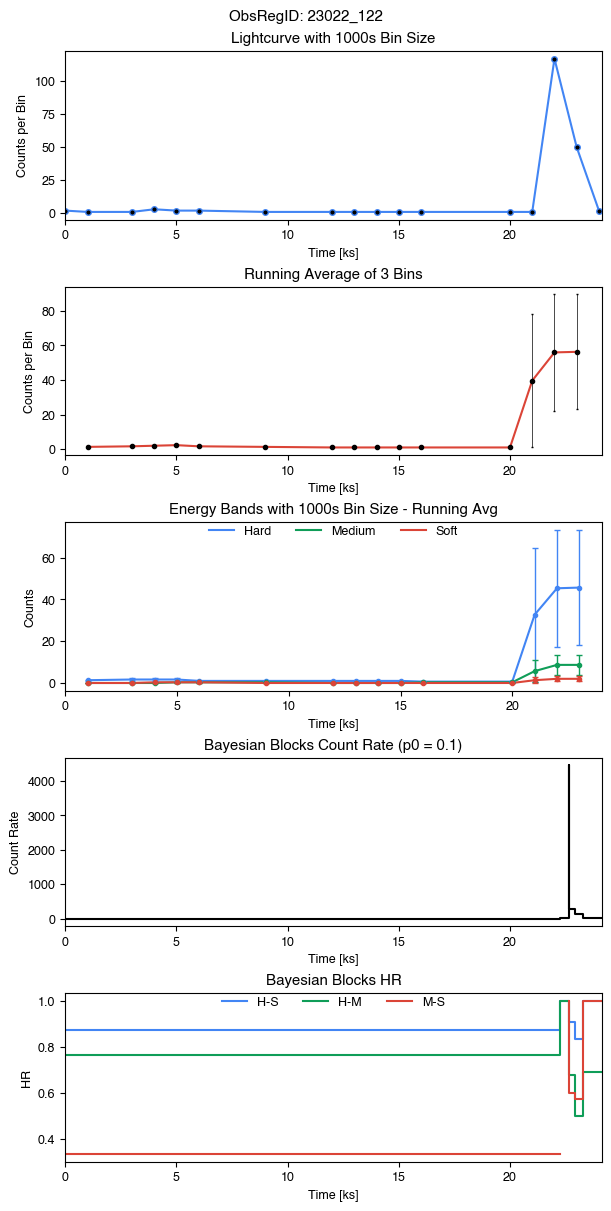

In [8]:
# keep = all_ids[50000:55000]
cmap = 'cividis' ##'RdYlBu' #'bwr' #'coolwarm_r' #'cividis' #'viridis'
bb_p0 = 0.1
pha_folder = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/'

df_eventfiles_group_filtered = df_eventfiles_group.filter(lambda x: x.name in keep).groupby('obsreg_id')
for id_name, dfi in df_eventfiles_group_filtered:
    dfi.sort_values(by='time', inplace = True) 
    dfi.reset_index(drop=True, inplace = True)
    # print('Bayesian Blocks p0: ', bb_p0)
    # Get IDs
    obsid = id_name.split("_")[0]
    regionid = id_name.split("_")[1]
    # Get property columns
    name = df_properties_anomalies[df_properties_anomalies['obsreg_id'] == id_name].name.values[0]
    ra = df_properties_anomalies[df_properties_anomalies['obsreg_id'] == id_name].ra.values[0]
    dec = df_properties_anomalies[df_properties_anomalies['obsreg_id'] == id_name].dec.values[0]
    date = df_properties_anomalies[df_properties_anomalies['obsreg_id'] == id_name].gti_obs.values[0] 
    print(f'Name: {name}, ID: {obsid}-{regionid}, Date: {date}, Counts: {len(dfi)}')
    print('RA ', str(ra), 'DEC ', str(dec))
    # Data Products
    lightcurveplotterNEW(dfi,id_name,1000,bb_p0=0.1)
    # # #obsid_search_csc(obsid = obsid, outfile='none', download='all',catalog='cur', filetype = 'lc,pha,rmf,arf', root = pha_folder
    # csc_plotter(dfi,id_name,pha_folder,group_counts = 10, fmt = '.', plot_what = 's', c1 = harvard, c2 = '#dfc16d', c3 = '#A51C30')
    # csc_plotter(dfi,id_name,pha_folder,group_counts = 10, fmt = '.', plot_what = 'lc', c1 = imperial, c2 = '#dfc16d', c3 = '#A51C30')
    # csc_plotter(dfi,id_name,pha_folder,group_counts = 10, fmt = '.', plot_what = 'lc-log', c1 = imperial, c2 = '#dfc16d', c3 = '#A51C30', t_start=23300, t_end=24500)

    # hist2D(dfi, id_name, 64, 64, norm = 'minmax', plot = True, colmap = 'plasma', lognorm = False)

    # lightcurveplotter(dfi,id_name,500,bb_p0=0.1)
    # print(dfi)
    # lc_plotter(dfi,id_name,bin_size_sec=500, bb_p0 = bb_p0, plot_what = 'lightcurve', c1 = harvard, c2 = silver, c3 = imperial)
    # lc_plotter(dfi,id_name,bin_size_sec=500, bb_p0 = bb_p0, plot_what = 'lightcurve', c1 = harvard, c2 = gold, c3 = imperial)
    # lc_plotter(dfi,id_name,bin_size_sec=500, bb_p0 = bb_p0, plot_what = 'bands', c1 = imperial, c2 = gold, c3 = harvard)
    # lc_plotter(dfi,id_name,bin_size_sec=500, bb_p0 = bb_p0, plot_what = 'bb', c1 = imperial, c2 = gold, c3 = harvard)
  

In [ ]:

# 6. Spectrum Plotter Function
def spec_plotter(df_eventfiles_input,id_name,bin_size):
    # Define Font Settings
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Gill Sans'
    # Define Color  Settings
    dark = '#003170'
    bright = '#cfbd62'
    grey = '#777777'
    # Prepare df
    df = df_eventfiles_input.copy()
    # Create binned lightcurve
    df_binned = df.groupby(df['energy'] // bin_size * bin_size).agg(broad_count = ('energy', lambda x: ((x >= 500) & (x <= 7000)).sum()))
    # Create rolling 3-bin averaged lightcurved
    df_rolling = df_binned.rolling(window=3, center=True).mean()
    rolling_std = df_binned.rolling(window=3, center=True).std()
    errors = rolling_std['broad_count']/math.sqrt(3)
    errors.iloc[0] = errors.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors.iloc[-1] = errors.iloc[-1] * math.sqrt(3)/math.sqrt(2)
    # Create subplots 
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    # Plot binned lightcurve
    print(f'Bin Size {bin_size}s')
    ax.step(df_binned.index/1000, df_binned['broad_count'], color = grey,where="mid")#, marker = 'o', markerfacecolor = 'black', markersize = 8)
    ax.fill_between(df_binned.index/1000, df_binned['broad_count'], step="mid", color = grey, alpha=0.4,label=f'Energy Binned Eventfile')
    ax.plot(df_rolling.index/1000, df_rolling['broad_count'], color = dark, label='Running Average Spectrum')
    ax.errorbar(df_rolling.index/1000, df_rolling['broad_count'], yerr = errors, xerr = None,fmt ='.',color = dark,linewidth = 1,capsize = 2)
    ax.set_xlabel('Energy [keV]')
    ax.set_ylabel('Counts')
    # ax.set_xscale('log')
    # ax.set_xlim([0.5,max(df_binned.index)/1000])
    ax.set_xlim(1E-1,10)  
    # ax.set_ylim([0,max(df_binned['broad_count'])*1.3])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.tick_params(which='both', direction='in', top=True, right=True)
    ax.minorticks_on()
    ax.legend(loc='best',frameon=False)
    plt.show()
    return

# 6. Image Plotter Function
def img_plotter(df_eventfiles_input,id_name,bin_size):
    # Define Font Settings
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Gill Sans'
    # Define Color  Settings
    dark = '#003170'
    bright = '#cfbd62'
    grey = '#777777'
    # Prepare df
    df = df_eventfiles_input.copy()
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    plt.hist2d()
    # Create 2D histogram
    plt.hist2d(x, y, bins=20, cmap='cividis')
    plt.colorbar()  # Add colorbar
    ax.set_xlabel('X-position')  # Set x-axis label
    ax.set_ylabel('Y-position')  # Set y-axis label

    ax.tick_params(which='both', direction='in', top=True, right=True)
    ax.minorticks_on()
    ax.legend(loc='upper left',frameon=False)
    plt.show()
    return

In [87]:
PATH = f'{global_path}/{set_id}'

search_csc('38.94521969459174, 34.68734478897538','1.0','test1.tsv','arcsec','', 'no', 'all', PATH, 'broad', 'lc,pha,rmf,arf', 'cur','1','1')

search_csc
             pos = 38.94521969459174, 34.68734478897538
          radius = 1
         outfile = test1.tsv
         radunit = arcsec
         columns = 
     sensitivity = no
        download = all
            root = /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full
           bands = broad
       filetypes = lc,pha,rmf,arf
         catalog = current
         verbose = 1
         clobber = yes
            mode = hl


2 rows returned by query
1 Different Master Source(s).
2 Different Observation(s).

name                	ra          	dec         	sepn	obsid	
 2CXO J023546.8+344115	3.894522e+01	3.468734e+01	0"	26201	
 2CXO J023546.8+344115	3.894522e+01	3.468734e+01	0"	 1870	
Retrieving files for obsid_obi 26201_000
Retrieved file /Users/steven/Library/MobileDocuments/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/2CXOJ023546.8+344115/26201_000/acisf26201_000N030_r0004_pha3.fits
Retrieved file /Users/steven/Library/MobileDocuments/com~apple~Cl